## Entendendo a correlação entre imagens - biblioteca Scipy  signal.correlate2d

### A correlação consiste no processo mover uma máscara (também chamada de kernel ou janela), através de uma imagem a ser inspecionada, com objetivo de calcular a soma do produtos em cada posição.

#### Exemplo simples, conforme demonstração da AULA 5 (Slide 9 e 10):
- Os valores 0 correspondem a cor preta;
- Os valores 1 correspondem a cor branca;
- Criação de uma template 3x3;
- Criação de um array a ser inspecionado;
- Cada pixel do array a ser inspecionado, será o resultado da soma dos produtos entre o template e os respectivos indices do array;
- O resultado no array final será a para cada pixel o valor de correlação com o template, sendo que o valor mais próximo de 0 escuros (menos intensidade) é o que possuem menos correspondencia e valores mais elevados - claros (mais intensidade) são os de maior correspôndencia.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal

template = np.array([[0,0,0],[0,1,1],[0,1,0]])
print('template (kernel) =\n',template)

image = np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,1,1,0],[0,0,1,1,0],[0,0,1,0,0]])
print('Imagem/array a ser inspecionado =\n',image)

corr = signal.correlate2d(image, template, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # Encontrar a correspondencia: Converte um índice simples ou uma matriz de índices simples em uma tupla de matrizes de coordenadas
#TENTAR IMPLEMENTAR A CORRELAÇÃO SEM BIBLIOTECA
#print(np.argmax(corr))
#print(corr.shape)
#print(y,x)
corr.astype(int)
print('Resultado da correlação =\n',corr)


template (kernel) =
 [[0 0 0]
 [0 1 1]
 [0 1 0]]
Imagem/array a ser inspecionado =
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 1 0]
 [0 0 1 1 0]
 [0 0 1 0 0]]
Resultado da correlação =
 [[0 0 0 0 0]
 [0 0 1 1 0]
 [0 1 3 2 0]
 [0 1 3 1 0]
 [0 1 2 0 0]]


In [2]:
corr = signal.correlate2d(image, template, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # Encontrar a correspondencia: Converte um índice simples ou uma matriz de índices simples em uma tupla de matrizes de coordenadas
print(np.argmax(corr))
print(corr.shape)
print(y,x)
corr.astype(int)
print(template)
print(corr)
#plt.imshow(template, cmap='gray')

12
(5, 5)
2 2
[[0 0 0]
 [0 1 1]
 [0 1 0]]
[[0 0 0 0 0]
 [0 0 1 1 0]
 [0 1 3 2 0]
 [0 1 3 1 0]
 [0 1 2 0 0]]


C:\Users\le-rc\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


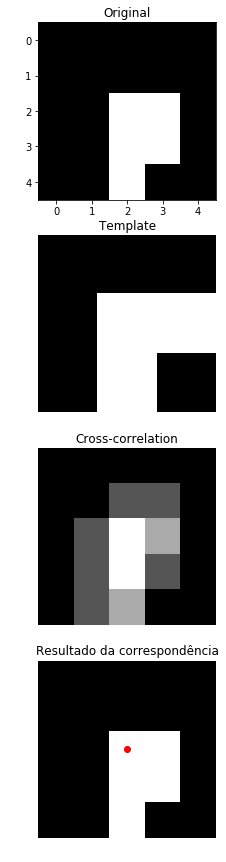

In [3]:
fig, (ax_orig, ax_template, ax_corr, ax_result) = plt.subplots(4, 1, figsize=(6, 15))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
#ax_orig.set_axis_off()

ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()

ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()

ax_result.imshow(image, cmap='gray')
ax_result.set_title('Resultado da correspondência')
ax_result.set_axis_off()

ax_result.plot(x, y, 'ro')
fig.show()

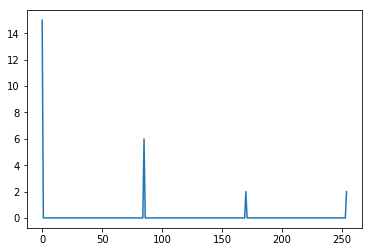

In [4]:
h,g = np.histogram(corr,255)
plt.plot(h)
plt.show()